<a href="https://colab.research.google.com/github/merasifa/PCVK/blob/main/WEEK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LANGKAH 1 IMPORT LIBRARY**

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt


**LANGKAH 2 BACA IMG DARI URL**

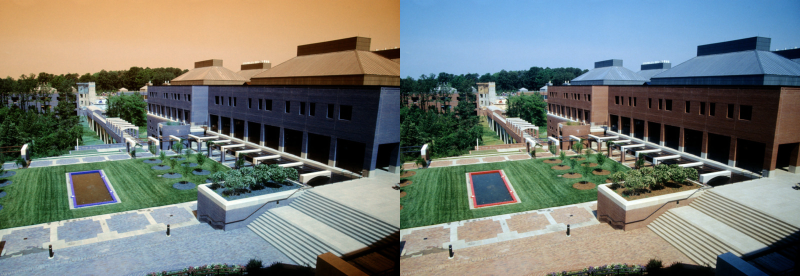

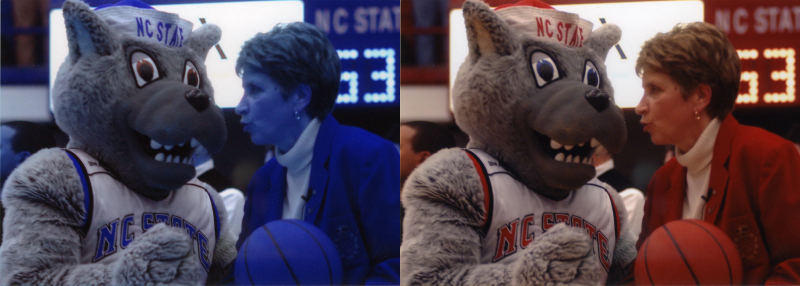

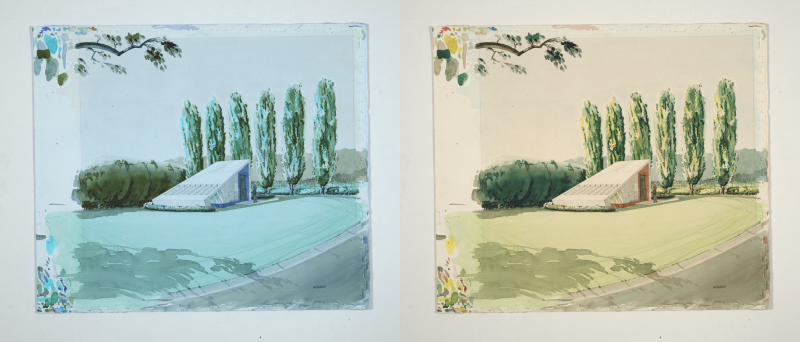

In [12]:
# Membuat list untuk menyimpan url dari beberapa image
urls = [
    "https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
    "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
    "https://iiif.lib.ncsu.edu/iiif/mc00198-008-ff0051-000-001_0001/full/800,/0/default.jpg"
]
# baca dan tampilkan image
# loop pada tiap url image, beberapa image dapat disimpan pada list
for url in urls:
    image = io.imread(url)                                # read image
    image = cv.resize(image, (0,0), fx=0.5, fy=0.5)       # resize image to half size
    image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)        # convert color to RGB
    final_frame = cv.hconcat([image, image_2])            # concatenate image
    cv2_imshow(final_frame)                               # show image
    print('\n')


**LANGKAH 3 MELIHAT UKURAN FILE IMAGE**

resolusi image: tinggi x lebar =  342  x  400


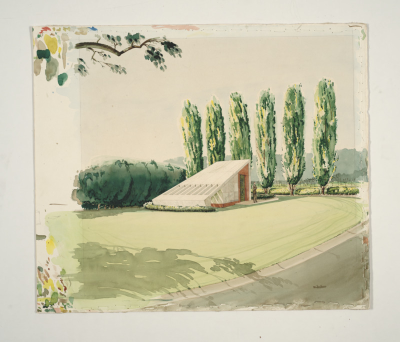

In [13]:
tinggi = image_2.shape[0]
lebar = image_2.shape[1]
print("resolusi image: tinggi x lebar = ", tinggi, " x ", lebar)
cv2_imshow(image_2)


**LANGKAH 4 MENGAKSES PIXELS DGN MEMEBERI GARIS DIAGONAL MENYILANG**

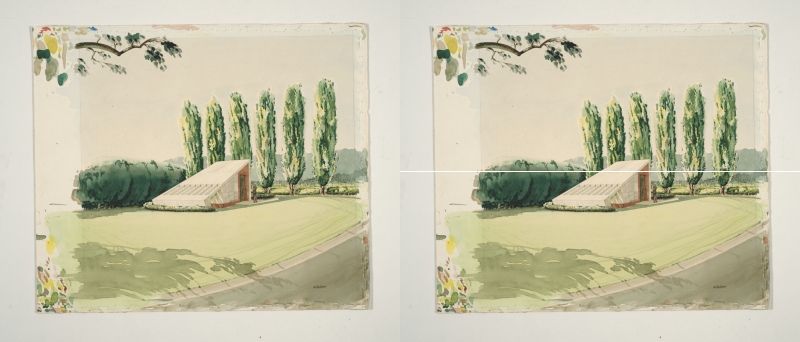

In [14]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# membuat garis horizontal ditengah image
for i in range(lebar):
    image_3[int((tinggi/2)), i] = [255, 255, 255]

final_frame = cv.hconcat([image_2, image_3])
cv2_imshow(final_frame)


Pertanyaan
1. Jelaskan, mengapa pada modul praktikum ini eksekusi kode Python dilakukan menggunakan Google Colab?
Google Colab digunakan karena praktis, gratis, mendukung GPU, tidak perlu instalasi, serta terhubung ke Google Drive dan GitHub untuk memudahkan penyimpanan dan pengelolaan kode.

2. Jelaskan mengenai kegunaan setiap library pada praktikum langkah ke delapan?
Apakah semua library tersebut harus digunakan dalam praktikum sesi ini?
numpy → digunakan untuk perhitungan numerik dan manipulasi array (misalnya merepresentasikan gambar dalam bentuk matriks).
pandas → untuk mengolah data dalam bentuk tabel (DataFrame), meskipun pada praktikum pengolahan citra tidak selalu digunakan.
cv2 (OpenCV) → library utama untuk membaca, memproses, dan memanipulasi gambar.
cv2_imshow (dari google.colab.patches) → khusus untuk menampilkan gambar di Google Colab, karena fungsi bawaan cv2.imshow() tidak bisa digunakan di Colab.
skimage.io → untuk membaca gambar dari berbagai format.
skimage.transform → untuk melakukan transformasi pada gambar, seperti resize, rotasi, dan skala.
PIL (Python Imaging Library) → untuk membuka, mengedit, dan memproses gambar.
matplotlib.pylab → digunakan untuk menampilkan gambar atau visualisasi hasil pengolahan citra.

3. Pada uji coba langkah ke-9 terdapat potongan kode program sebagai berikut : image = cv.resize(image, (0,0), fx=0.5, fy=0.5)
Apa kegunaan kode program tersebut?dan apa pengaruhnya jika tidak dilakukan?
Kode program image = cv.resize(image, (0,0), fx=0.5, fy=0.5) berfungsi untuk mengecilkan ukuran gambar menjadi setengah dari ukuran aslinya, baik dari sisi lebar maupun tinggi. Tujuannya agar gambar lebih ringan diproses, mengurangi beban memori, dan mempercepat eksekusi program terutama jika gambar berukuran besar.Kalau kode ini tidak dilakukan, maka gambar akan tetap diproses dalam ukuran aslinya. Akibatnya, program bisa menjadi lebih lambat, memakan lebih banyak memori, dan pada komputer dengan spesifikasi rendah bisa saja terjadi lag atau error karena beban pemrosesan terlalu besar.

4. Perhatikan potongan kode progam berikut :
Apakah kegunaan kode [255,255,255] ? Jelaskan!
Kode ini merepresentasikan warna putih dalam format RGB.
255 → nilai maksimum untuk warna merah
255 → nilai maksimum untuk warna hijau
255 → nilai maksimum untuk warna biru
Jika semua komponen warna diisi dengan nilai 255, hasilnya adalah putih. Kode ini biasanya dipakai untuk memberi warna pada pixel tertentu, background, atau menggambar objek putih di atas gambar.

5. Jelaskan keterkaitan antara pixel dan juga resolusi gambar yang tinggi ataupun rendah!
Pixel adalah unit terkecil dalam gambar. Semakin tinggi resolusi, semakin banyak pixel sehingga detail gambar lebih jelas; resolusi rendah berarti pixel sedikit sehingga gambar tampak buram atau pecah.


**TUGAS**

1. Buat garis vertikal dan garis menyilang diagonal pada image keluaran


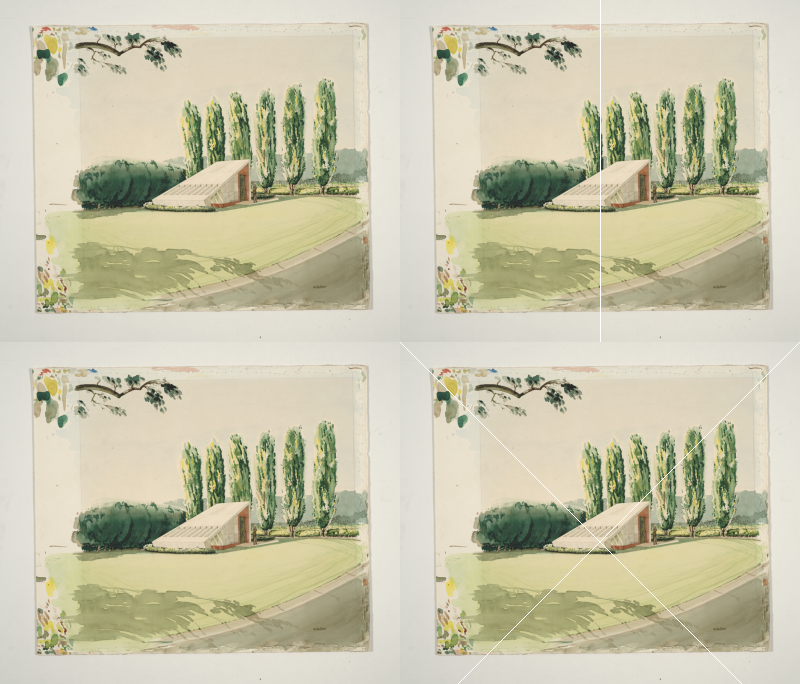

In [22]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# ---- bikin salinan untuk vertikal ----
image_vertikal = image_2.copy()
for i in range(tinggi):
    image_vertikal[i, int(lebar/2)] = [255, 255, 255]

# ---- bikin salinan untuk menyilang ----
image_silang = image_2.copy()
for i in range(min(tinggi, lebar)):
    image_silang[i, i] = [255, 255, 255]               # diagonal utama
    image_silang[i, lebar - i - 1] = [255, 255, 255]   # diagonal kebalik

# ---- gabungkan hasil jadi 2 baris ----
row1 = cv.hconcat([image_2, image_vertikal])   # baris pertama
row2 = cv.hconcat([image_2, image_silang])     # baris kedua

final_frame = cv.vconcat([row1, row2])
cv2_imshow(final_frame)


3. Buat garis horisontal berwarna putih dibagian tengah gambar dengan panjang tertentu

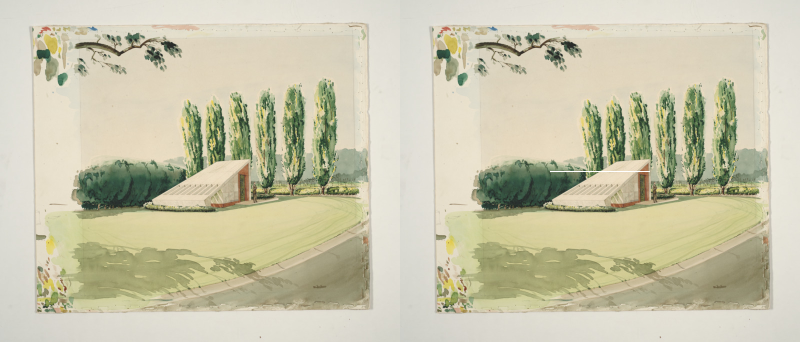

In [25]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

y = int(tinggi / 2)              # posisi tengah vertikal
start_x = int(lebar/2 - 50)      # titik awal garis (mundur 50 piksel dari tengah)
end_x   = int(lebar/2 + 50)      # titik akhir garis (maju 50 piksel dari tengah)

# gambar garis horizontal
for x in range(start_x, end_x):
    image_3[y, x] = [255, 255, 255]   # warna putih

final_frame = cv.hconcat([image_2, image_3])
cv2_imshow(final_frame)


4. Buat kotak menggunakan kumpulan pixel warna putih di sembarang tempat dalam
gambar

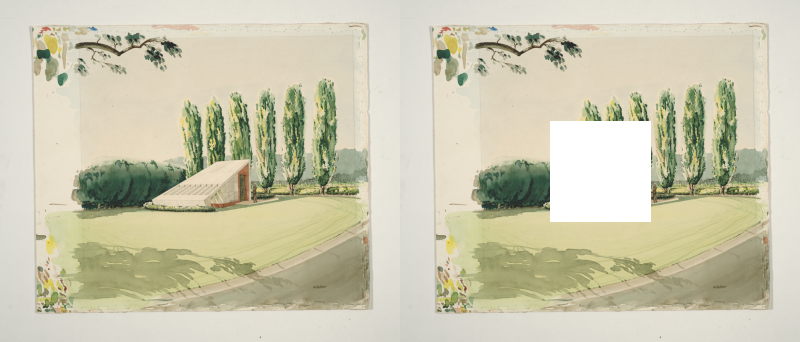

In [27]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = image_2.copy()

# ukuran kotak
box_width = 100
box_height = 100

# hitung posisi tengah
center_x = int(lebar / 2)
center_y = int(tinggi / 2)

# koordinat pojok kiri atas dan kanan bawah
start_point = (center_x - box_width // 2, center_y - box_height // 2)
end_point   = (center_x + box_width // 2, center_y + box_height // 2)

# gambar kotak (putih, isi penuh)
cv.rectangle(image_3, start_point, end_point, (255, 255, 255), -1)

# gabungkan hasil
final_frame = cv.hconcat([image_2, image_3])
cv2_imshow(final_frame)


**TUGAS KELOMPOK**

In [28]:
import cv2 as cv
import matplotlib.pyplot as plt

In [30]:
image = cv.imread("ktp.jpeg")

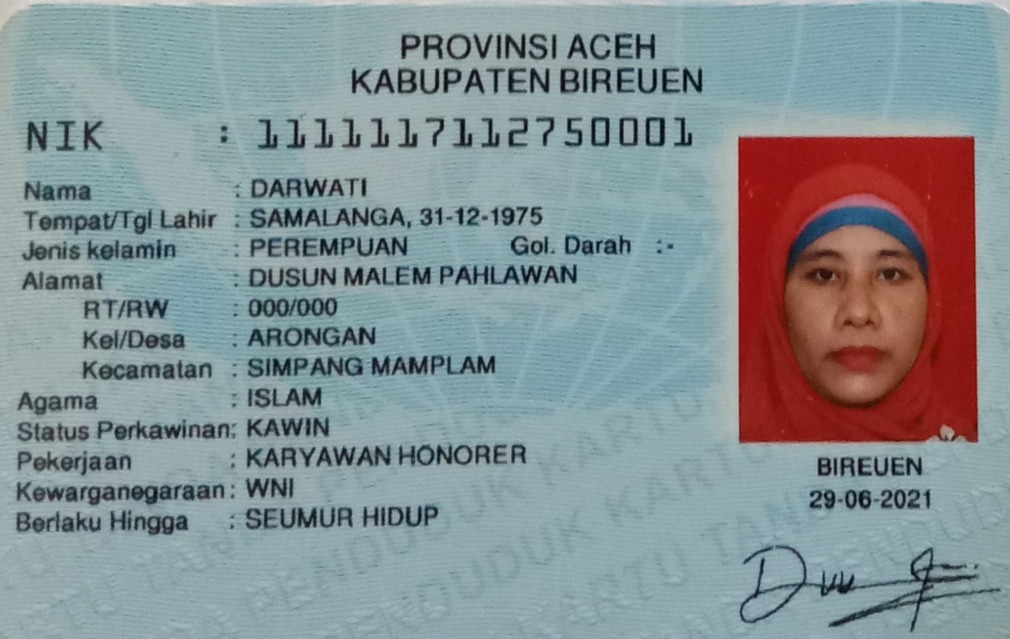

In [34]:
cv2_imshow(image)

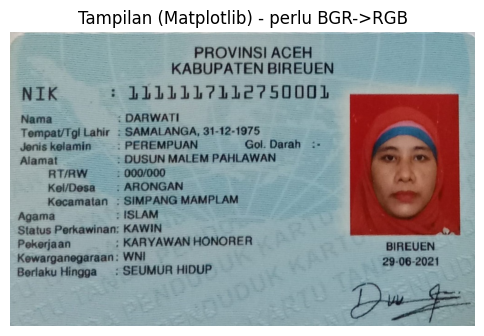

In [36]:
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(6,4))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Tampilan (Matplotlib) - perlu BGR->RGB")
plt.show()

(639, 1010, 3)


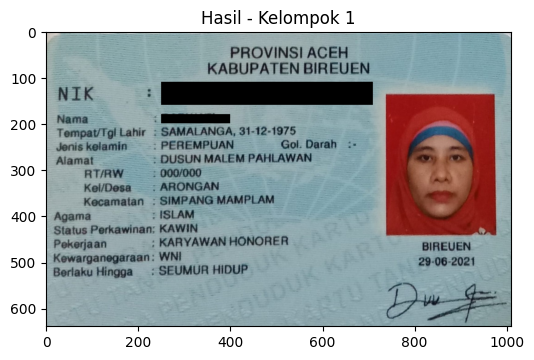

In [107]:
# 3) FUNGSI UTILITY: MASK (menutup kotak) DGN KOORDINAT ABSOLUT
def mask_boxes_by_absolute_coords(img_rgb, boxes, color):
    h, w = img_rgb.shape[:2]
    out = img_rgb.copy()
    for (x1, y1, x2, y2) in boxes:
        # pastikan tidak keluar batas gambar
        x1 = max(0, min(w, x1))
        x2 = max(0, min(w, x2))
        y1 = max(0, min(h, y1))
        y2 = max(0, min(h, y2))
        # apply color
        out[y1:y2, x1:x2] = color
    return out
print(image_rgb.shape)   # (tinggi, lebar, channel)


# 4) DEFINISI AREA PER KELOMPOK (pakai pixel ABSOLUT)
# Contoh (harus kamu sesuaikan dgn ukuran KTP yg kamu punya)
kelompok_boxes = {
    1: [
        (250, 110, 710, 160),  # area NIK #kiri atas kanan bawah
        (250, 180, 400, 200),  # area Nama
      ],
}

# 5) Pilih dua warna berbeda
warna_A = (0, 0, 0)        # hitam
warna_B = (255, 255, 255)  # putih

# 7) Contoh tampilkan semua kelompok
for gid in range(1, 2):  # ubah jadi (1,11) kalau sudah lengkap
    out = mask_for_group(image_rgb, gid)
    plt.figure(figsize=(6,4))
    plt.imshow(out)
    plt.axis("on")
    plt.title(f"Hasil - Kelompok {gid}")
    plt.show()
